In [122]:
import math
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics
import seaborn as sns

In [207]:
CD = pd.read_csv("~/Downloads/cardio_train.csv",sep=";")
list(CD)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [124]:
CD.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [125]:
CD.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [126]:
CD.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [127]:
CD.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [128]:
CD.shape

(70000, 13)

In [129]:
CD.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
str(CD)

'          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \\\n0          0  18393       2     168    62.0    110     80            1     1   \n1          1  20228       1     156    85.0    140     90            3     1   \n2          2  18857       1     165    64.0    130     70            3     1   \n3          3  17623       2     169    82.0    150    100            1     1   \n4          4  17474       1     156    56.0    100     60            1     1   \n...      ...    ...     ...     ...     ...    ...    ...          ...   ...   \n69995  99993  19240       2     168    76.0    120     80            1     1   \n69996  99995  22601       1     158   126.0    140     90            2     2   \n69997  99996  19066       2     183   105.0    180     90            3     1   \n69998  99998  22431       1     163    72.0    135     80            1     2   \n69999  99999  20540       1     170    72.0    120     80            2     1   \n\n       smoke  alco  acti

In [131]:
CD.isnull().values.any()

False

In [132]:
print(CD.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [133]:
to_drop = ['id']
CD.drop(to_drop, inplace=True, axis=1)

CD.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [134]:
CD["age"] = round(CD["age"] / 365)
CD.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot:title={'center':'Distribution of age'}, xlabel='Age', ylabel='Count'>

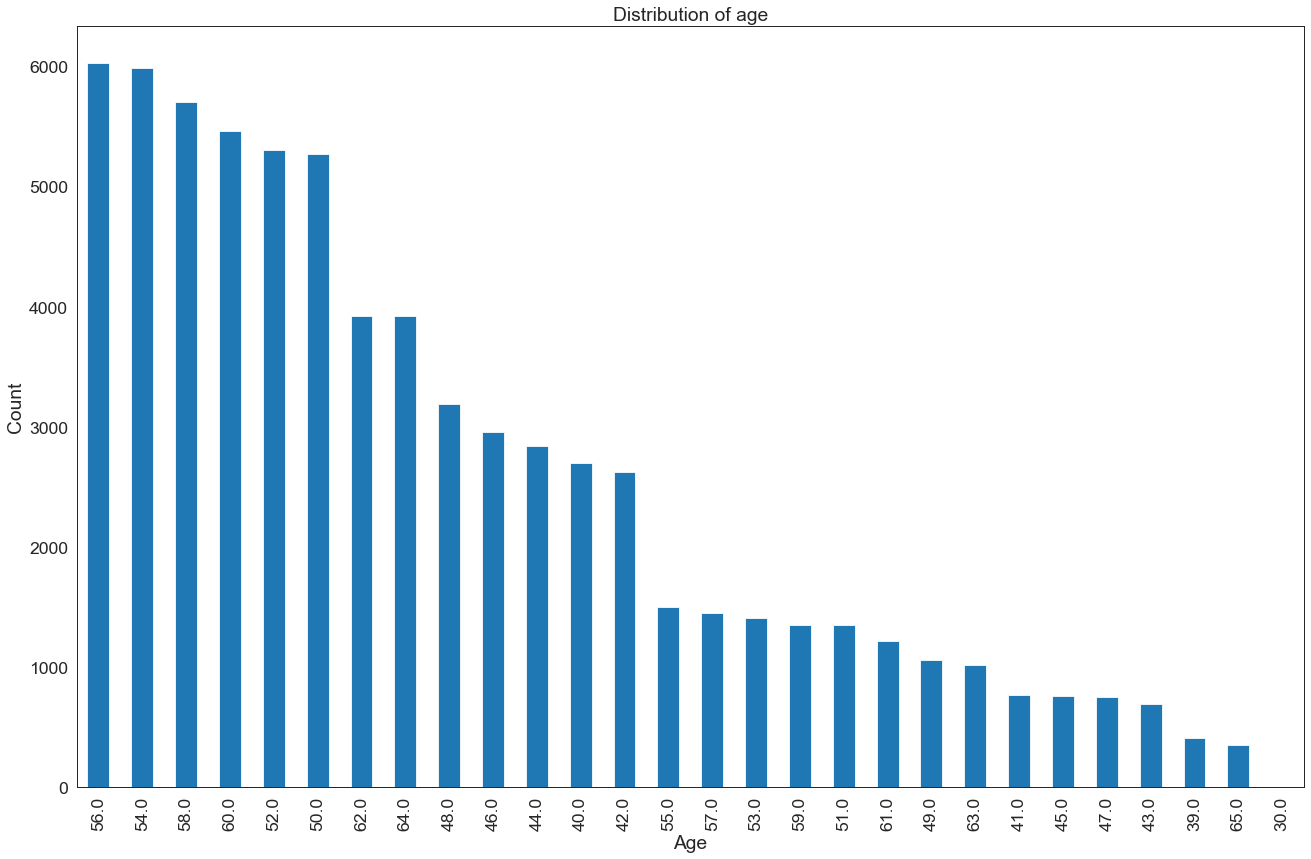

In [135]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of age')
ax.set_xlabel("Age")
ax.set_ylabel("Count")
CD["age"].value_counts().plot(ax = ax, kind = "bar")

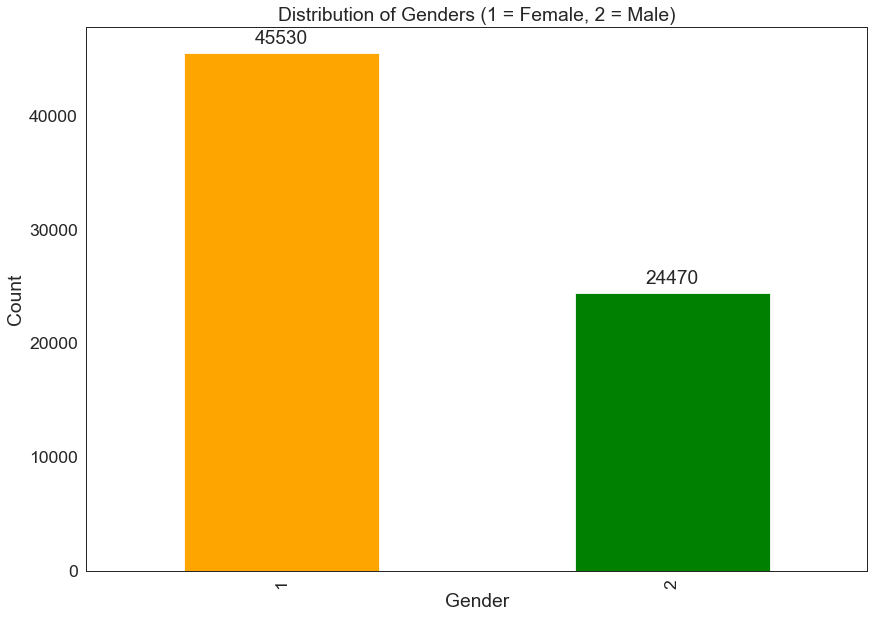

In [136]:
fig, ax = plt.subplots(figsize = (14, 10))
ax.set_title('Distribution of Genders (1 = Female, 2 = Male)')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
CD["gender"].value_counts().plot(ax = ax, kind = "bar",color=['orange','green'])

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

<AxesSubplot:title={'center':'Distribution of height'}, xlabel='height', ylabel='Count'>

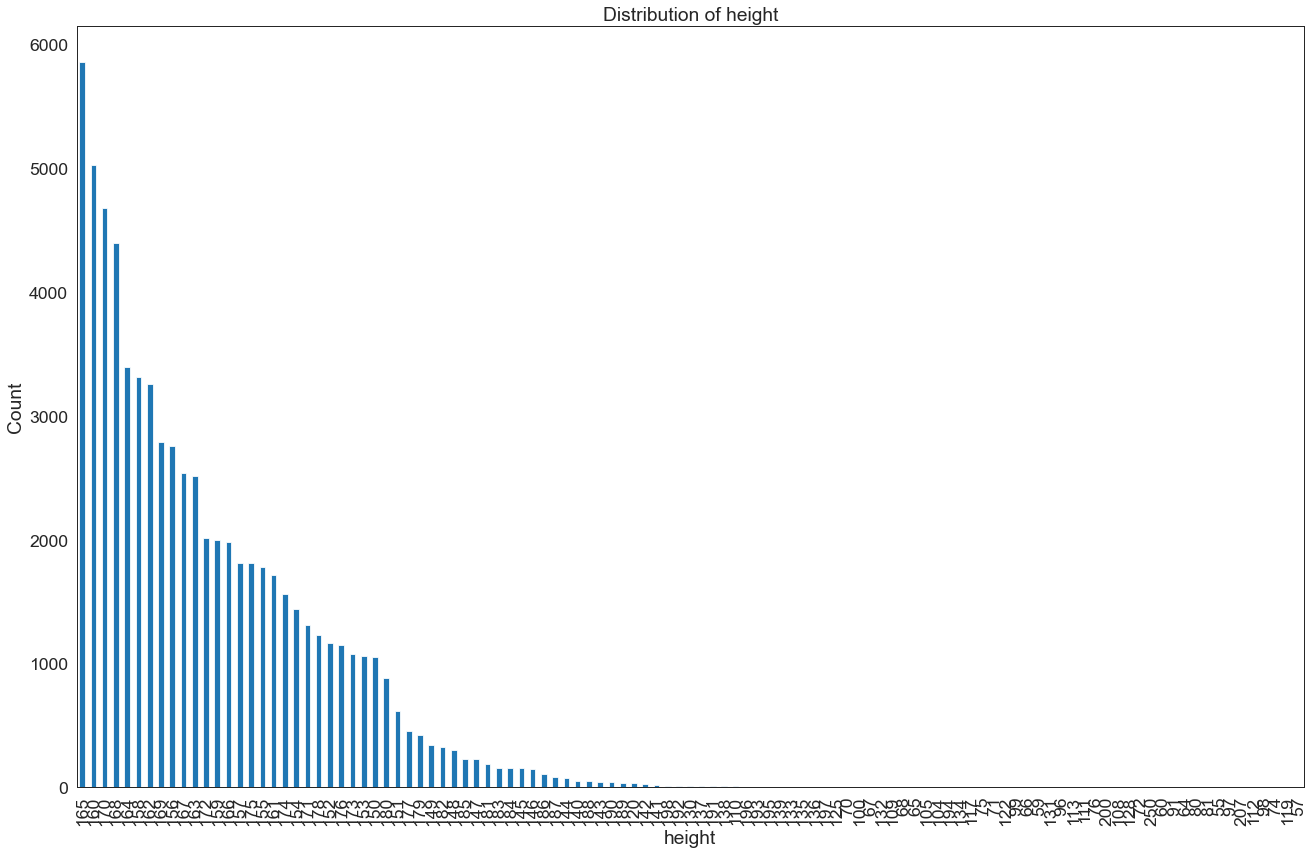

In [137]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of height')
ax.set_xlabel("height")
ax.set_ylabel("Count")
CD["height"].value_counts().plot(ax = ax, kind = "bar")

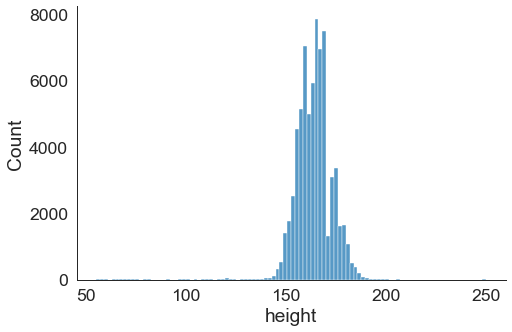

In [138]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=CD, x="height", kind="hist", bins = 100, aspect = 1.5)

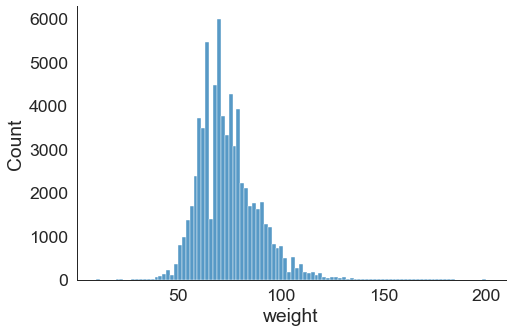

In [139]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=CD, x="weight", kind="hist", bins = 100, aspect = 1.5)

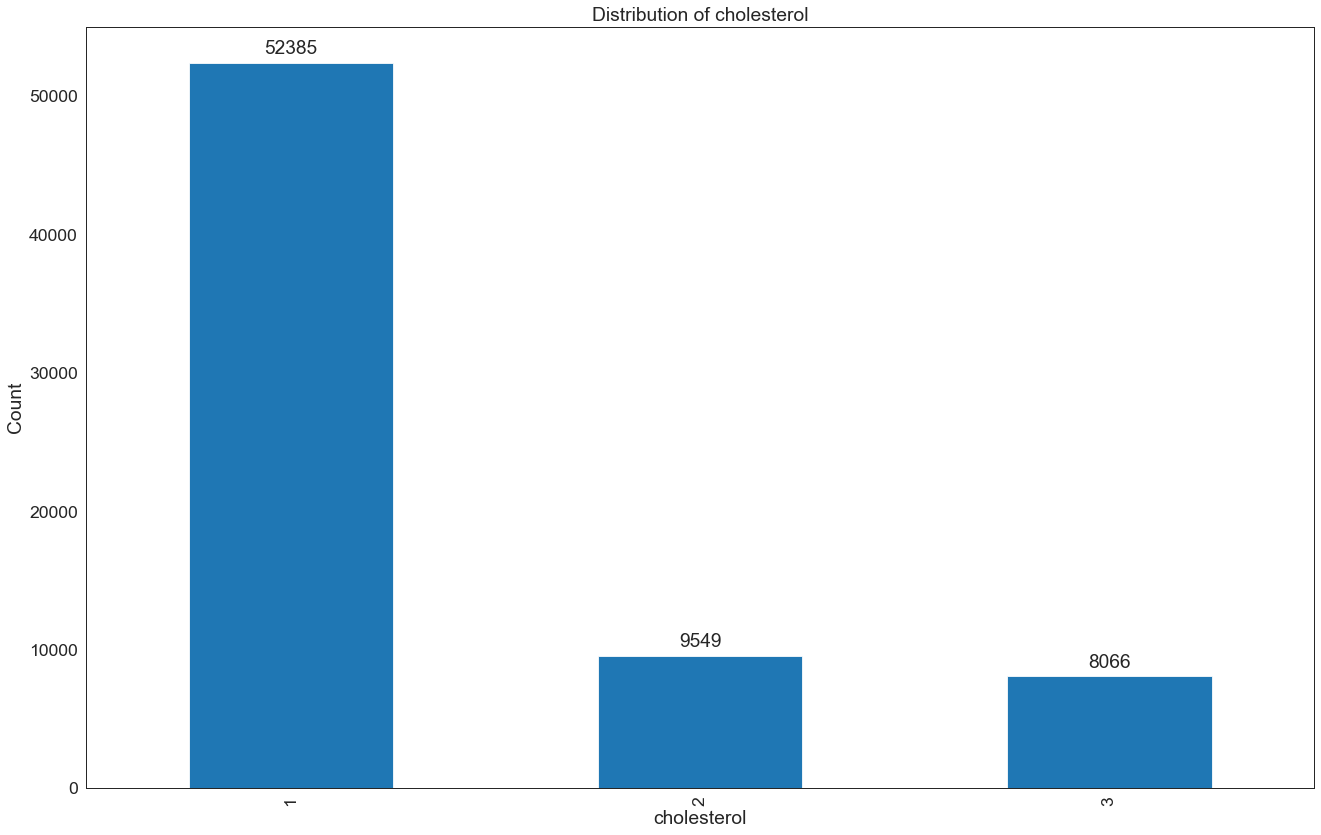

In [140]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of cholesterol')
ax.set_xlabel("cholesterol")
ax.set_ylabel("Count")
CD["cholesterol"].value_counts().plot(ax = ax, kind = "bar")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

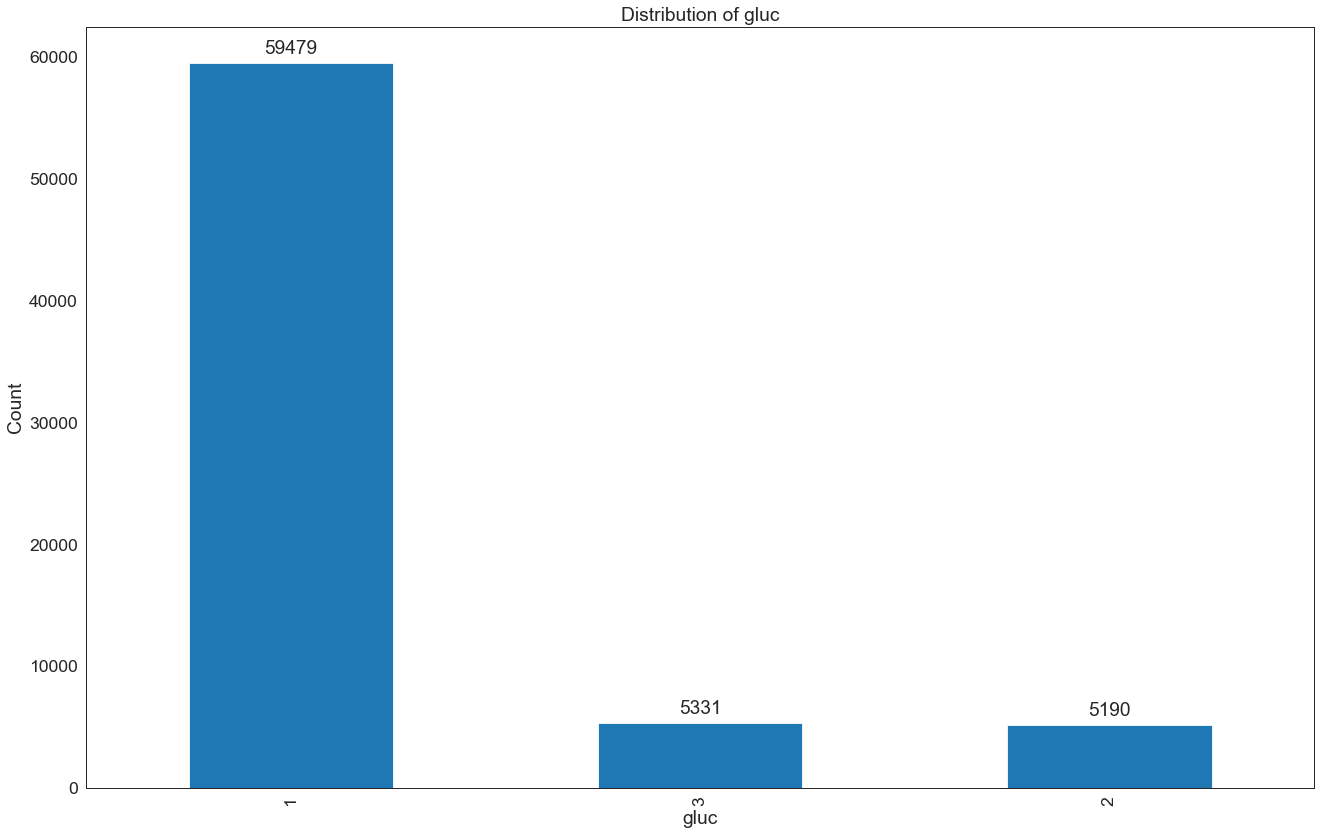

In [141]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of gluc')
ax.set_xlabel("gluc")
ax.set_ylabel("Count")
CD["gluc"].value_counts().plot(ax = ax, kind = "bar")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

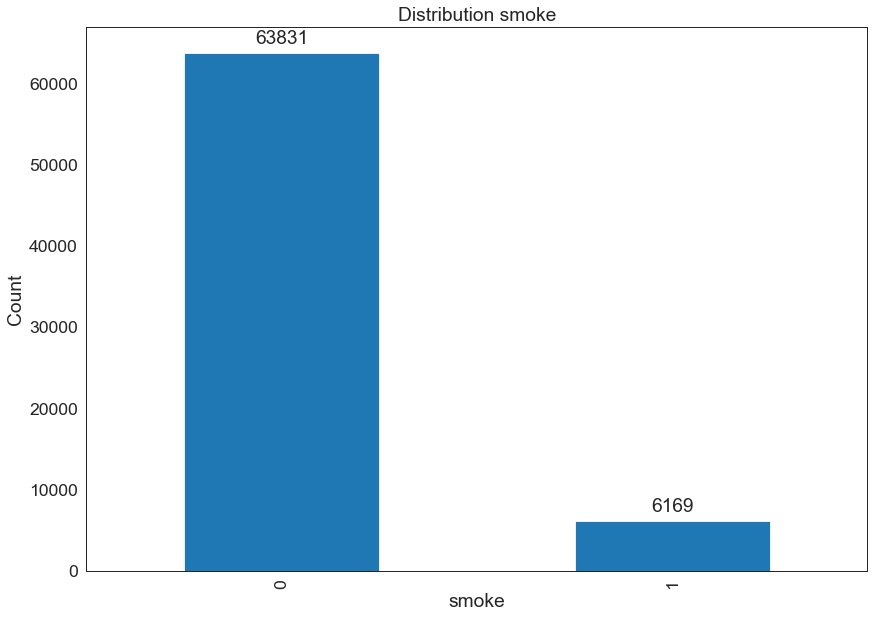

In [142]:
fig, ax = plt.subplots(figsize = (14, 10))
ax.set_title('Distribution smoke')
ax.set_xlabel("smoke")
ax.set_ylabel("Count")
CD["smoke"].value_counts().plot(ax = ax, kind = "bar")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

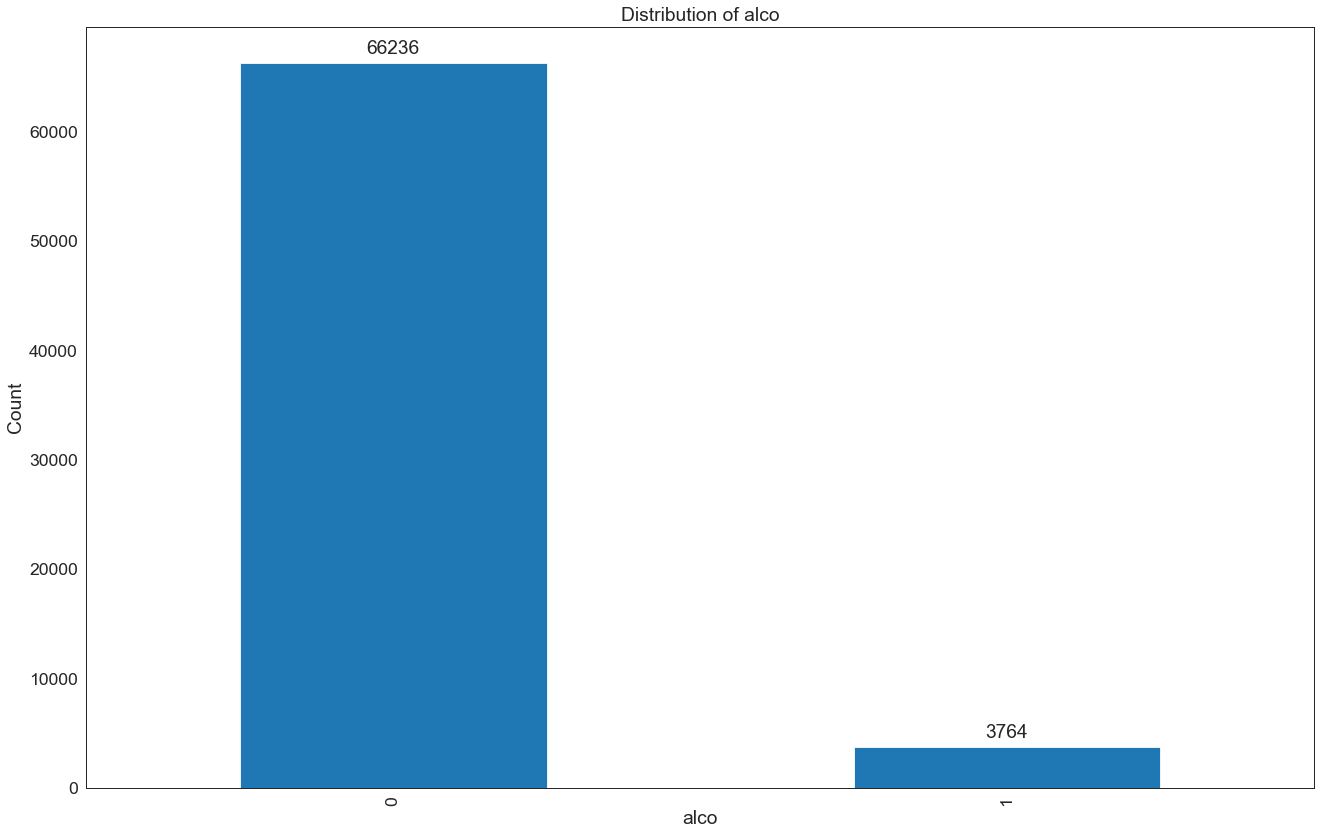

In [143]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of alco')
ax.set_xlabel("alco")
ax.set_ylabel("Count")
CD["alco"].value_counts().plot(ax = ax, kind = "bar")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

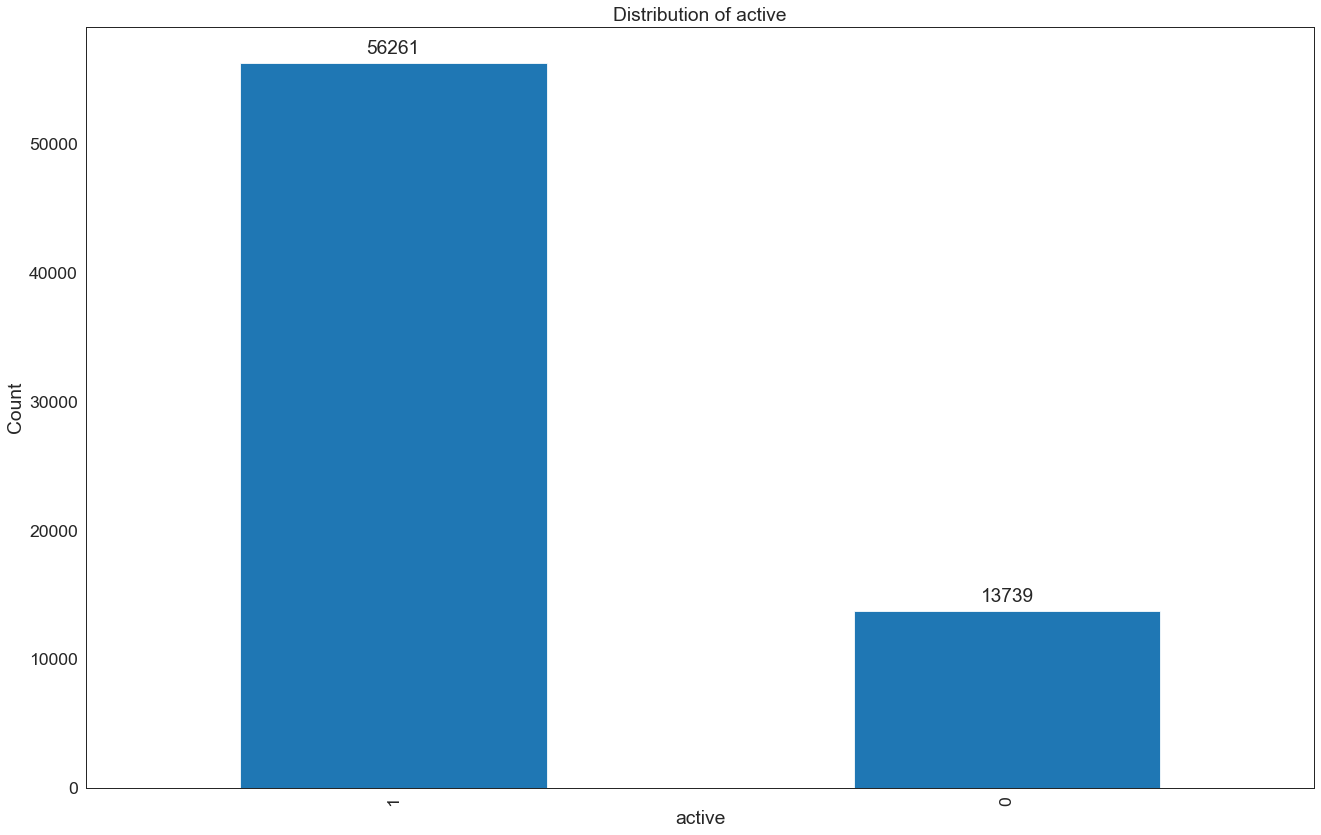

In [144]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of active')
ax.set_xlabel("active")
ax.set_ylabel("Count")
CD["active"].value_counts().plot(ax = ax, kind = "bar")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

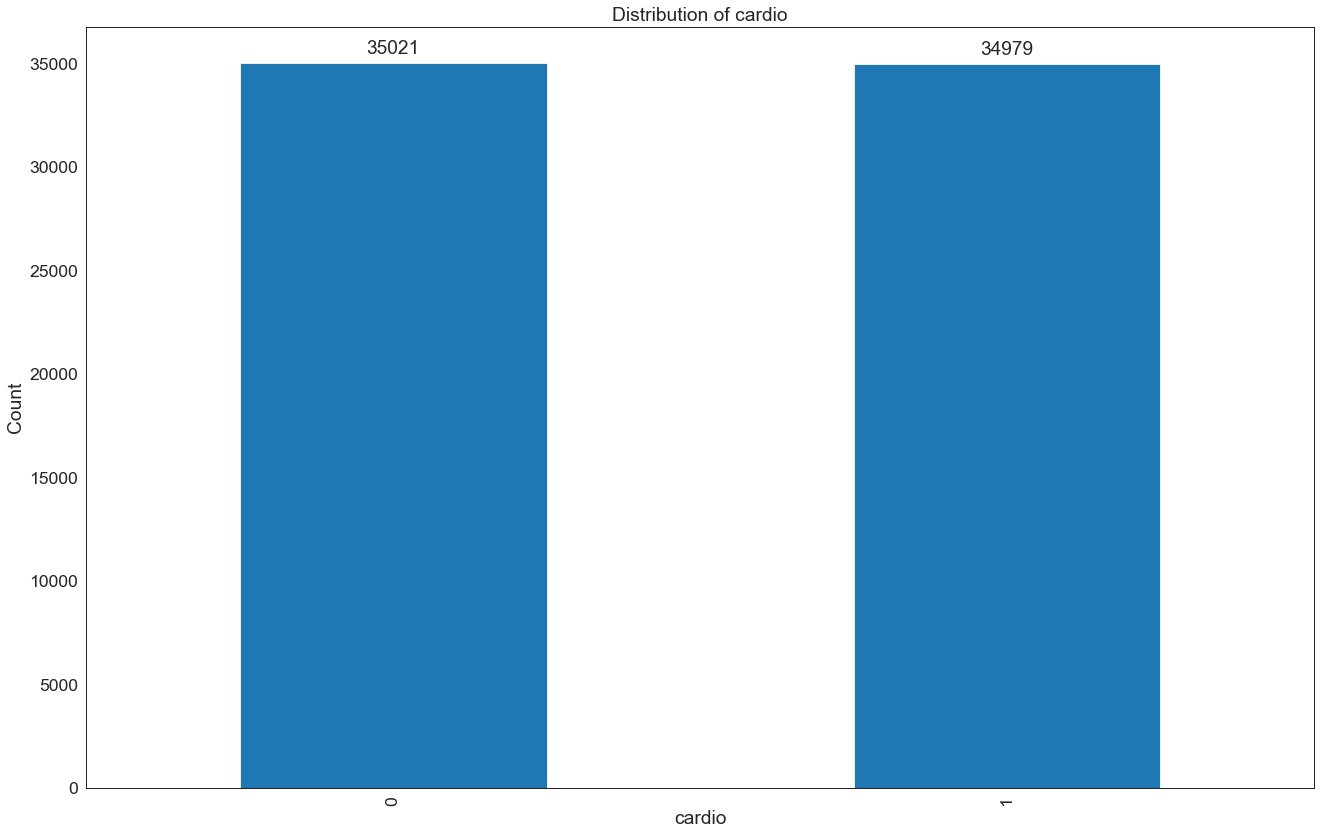

In [145]:
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of cardio')
ax.set_xlabel("cardio")
ax.set_ylabel("Count")
CD["cardio"].value_counts().plot(ax = ax, kind = "bar")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

In [146]:
import seaborn as sns
from matplotlib import rcParams

<AxesSubplot:xlabel='age', ylabel='count'>

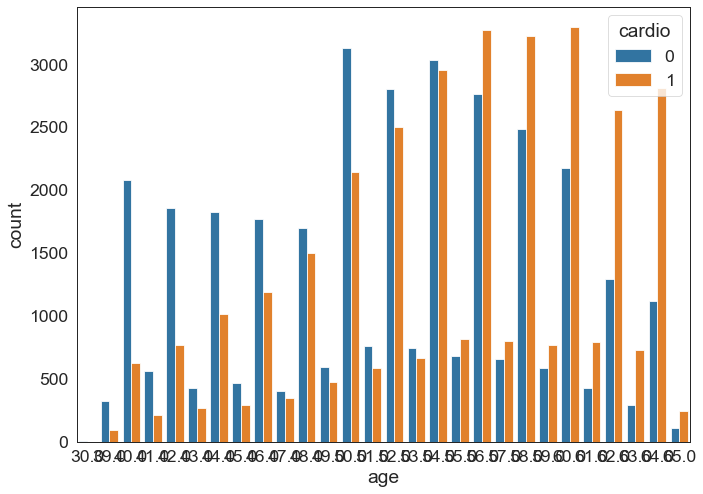

In [147]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = CD)

<AxesSubplot:xlabel='gender', ylabel='count'>

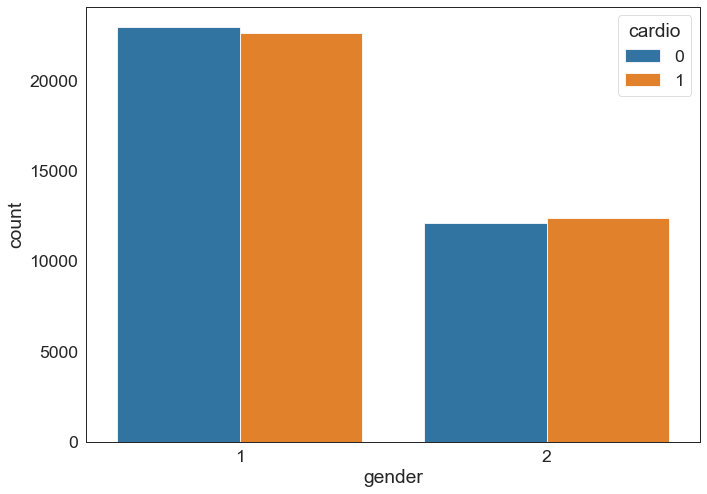

In [148]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = CD)

<AxesSubplot:xlabel='smoke', ylabel='count'>

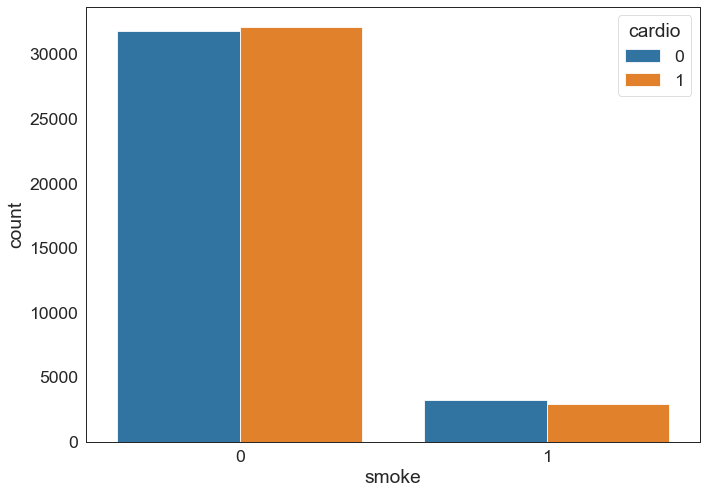

In [149]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='smoke', hue='cardio', data = CD)

<AxesSubplot:xlabel='active', ylabel='count'>

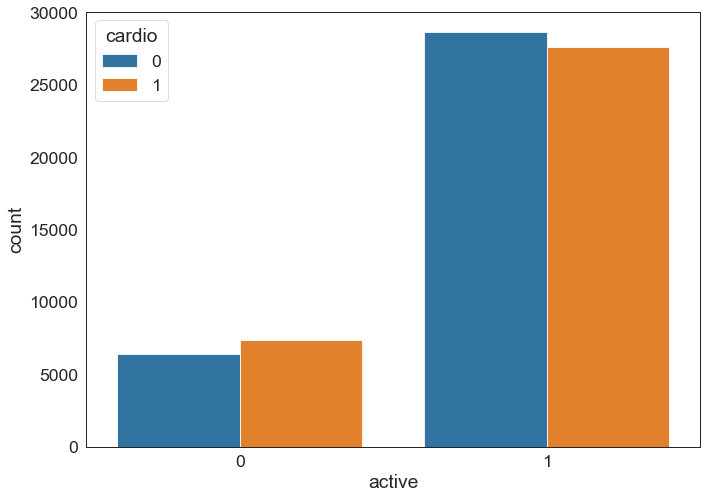

In [150]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='active', hue='cardio', data = CD)

<AxesSubplot:xlabel='alco', ylabel='count'>

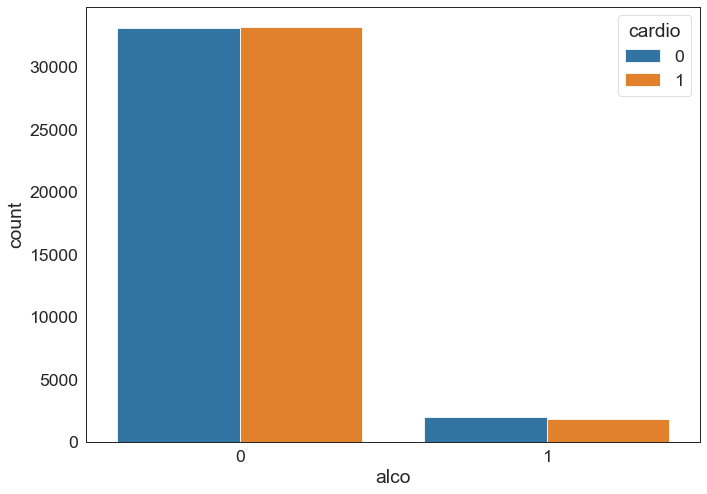

In [151]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='alco', hue='cardio', data = CD)

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

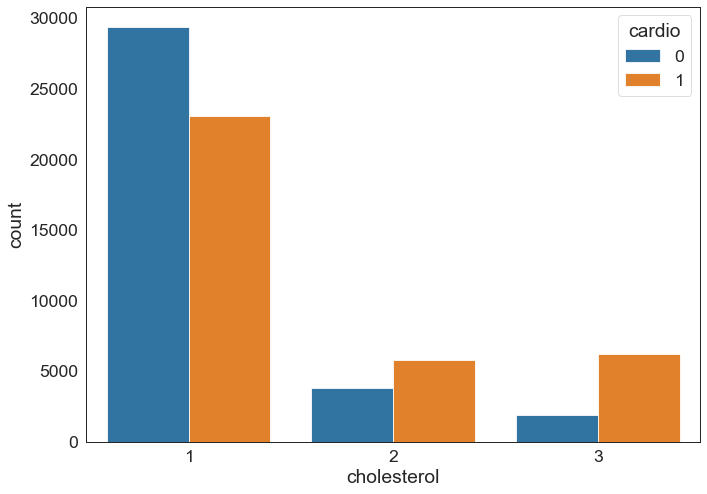

In [152]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='cholesterol', hue='cardio', data = CD)

<AxesSubplot:xlabel='gluc', ylabel='count'>

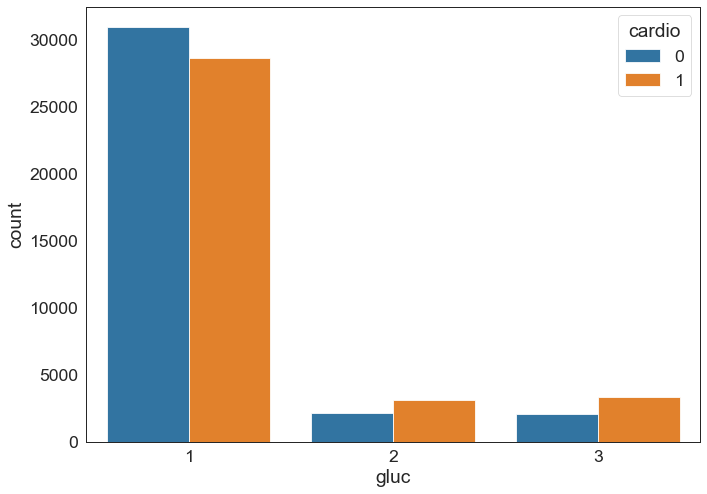

In [153]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gluc', hue='cardio', data = CD)

In [154]:
# Age vs Cardio
corr = CD[['age', 'cardio']].corr()
corr

,age,cardio
age,1.000000,0.237749
cardio,0.237749,1.000000


In [155]:
# Gender vs Cardio
corr = CD[['gender', 'cardio']].corr()
corr

,gender,cardio
gender,1.000000,0.008109
cardio,0.008109,1.000000


In [156]:
# Height vs Cardio
corr = CD[['height', 'cardio']].corr()
corr

,height,cardio
height,1.000000,-0.010821
cardio,-0.010821,1.000000


In [157]:
# Weight vs Cardio
corr = CD[['weight', 'cardio']].corr()
corr

,weight,cardio
weight,1.00000,0.18166
cardio,0.18166,1.00000


In [158]:
# ap_hi vs Cardio
corr = CD[['ap_hi', 'cardio']].corr()
corr

,ap_hi,cardio
ap_hi,1.000000,0.054475
cardio,0.054475,1.000000


In [159]:
# ap_lo vs Cardio
corr = CD[['ap_lo', 'cardio']].corr()
corr

,ap_lo,cardio
ap_lo,1.000000,0.065719
cardio,0.065719,1.000000


In [160]:
# cholesterol vs Cardio
corr = CD[['cholesterol', 'cardio']].corr()
corr

,cholesterol,cardio
cholesterol,1.000000,0.221147
cardio,0.221147,1.000000


In [161]:
# gluc vs Cardio
corr = CD[['gluc', 'cardio']].corr()
corr

,gluc,cardio
gluc,1.000000,0.089307
cardio,0.089307,1.000000


In [162]:
# Calculate the mean of X and y
xmean = np.mean(CD.age)
ymean = np.mean(CD.cardio)

# Calculate the terms needed for the numator and denominator of beta
CD['xycov'] = (CD['age'] - xmean) * (CD['cardio'] - ymean)
CD['xvar'] = (CD['age'] - xmean)**2

# Calculate beta and alpha
beta = CD['xycov'].sum() / CD['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = -0.43753352596766
beta = 0.017571365199886065


<AxesSubplot:xlabel='weight', ylabel='ap_hi'>

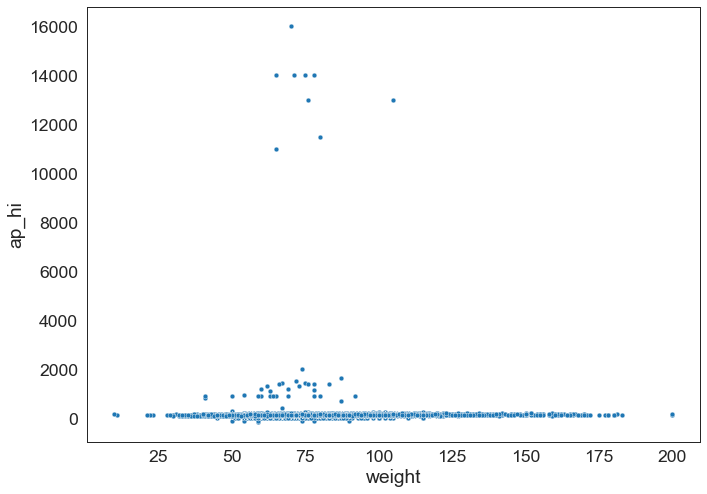

In [210]:
sns.scatterplot(x="weight", y="ap_hi", data=CD)

<AxesSubplot:xlabel='weight', ylabel='ap_lo'>

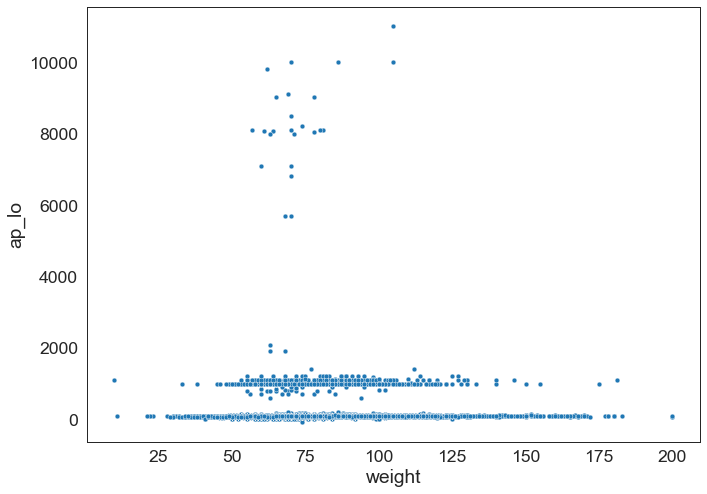

In [211]:
sns.scatterplot(x="weight", y="ap_lo", data=CD)

In [213]:
cormat = CD.corr()
round(cormat,2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,0.00,0.00,0.00
age,0.00,1.00,-0.02,-0.08,0.05,0.02,0.02,0.15,0.10,-0.05,-0.03,-0.01,0.24
gender,0.00,-0.02,1.00,0.50,0.16,0.01,0.02,-0.04,-0.02,0.34,0.17,0.01,0.01
height,-0.00,-0.08,0.50,1.00,0.29,0.01,0.01,-0.05,-0.02,0.19,0.09,-0.01,-0.01
weight,-0.00,0.05,0.16,0.29,1.00,0.03,0.04,0.14,0.11,0.07,0.07,-0.02,0.18
ap_hi,0.00,0.02,0.01,0.01,0.03,1.00,0.02,0.02,0.01,-0.00,0.00,-0.00,0.05
ap_lo,-0.00,0.02,0.02,0.01,0.04,0.02,1.00,0.02,0.01,0.01,0.01,0.00,0.07
cholesterol,0.01,0.15,-0.04,-0.05,0.14,0.02,0.02,1.00,0.45,0.01,0.04,0.01,0.22
gluc,0.00,0.10,-0.02,-0.02,0.11,0.01,0.01,0.45,1.00,-0.00,0.01,-0.01,0.09
smoke,-0.00,-0.05,0.34,0.19,0.07,-0.00,0.01,0.01,-0.00,1.00,0.34,0.03,-0.02


<AxesSubplot:>

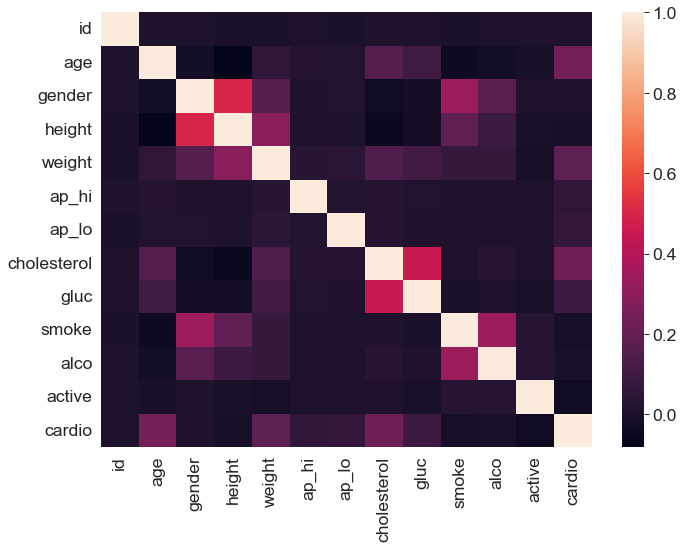

In [214]:
sns.heatmap(cormat)

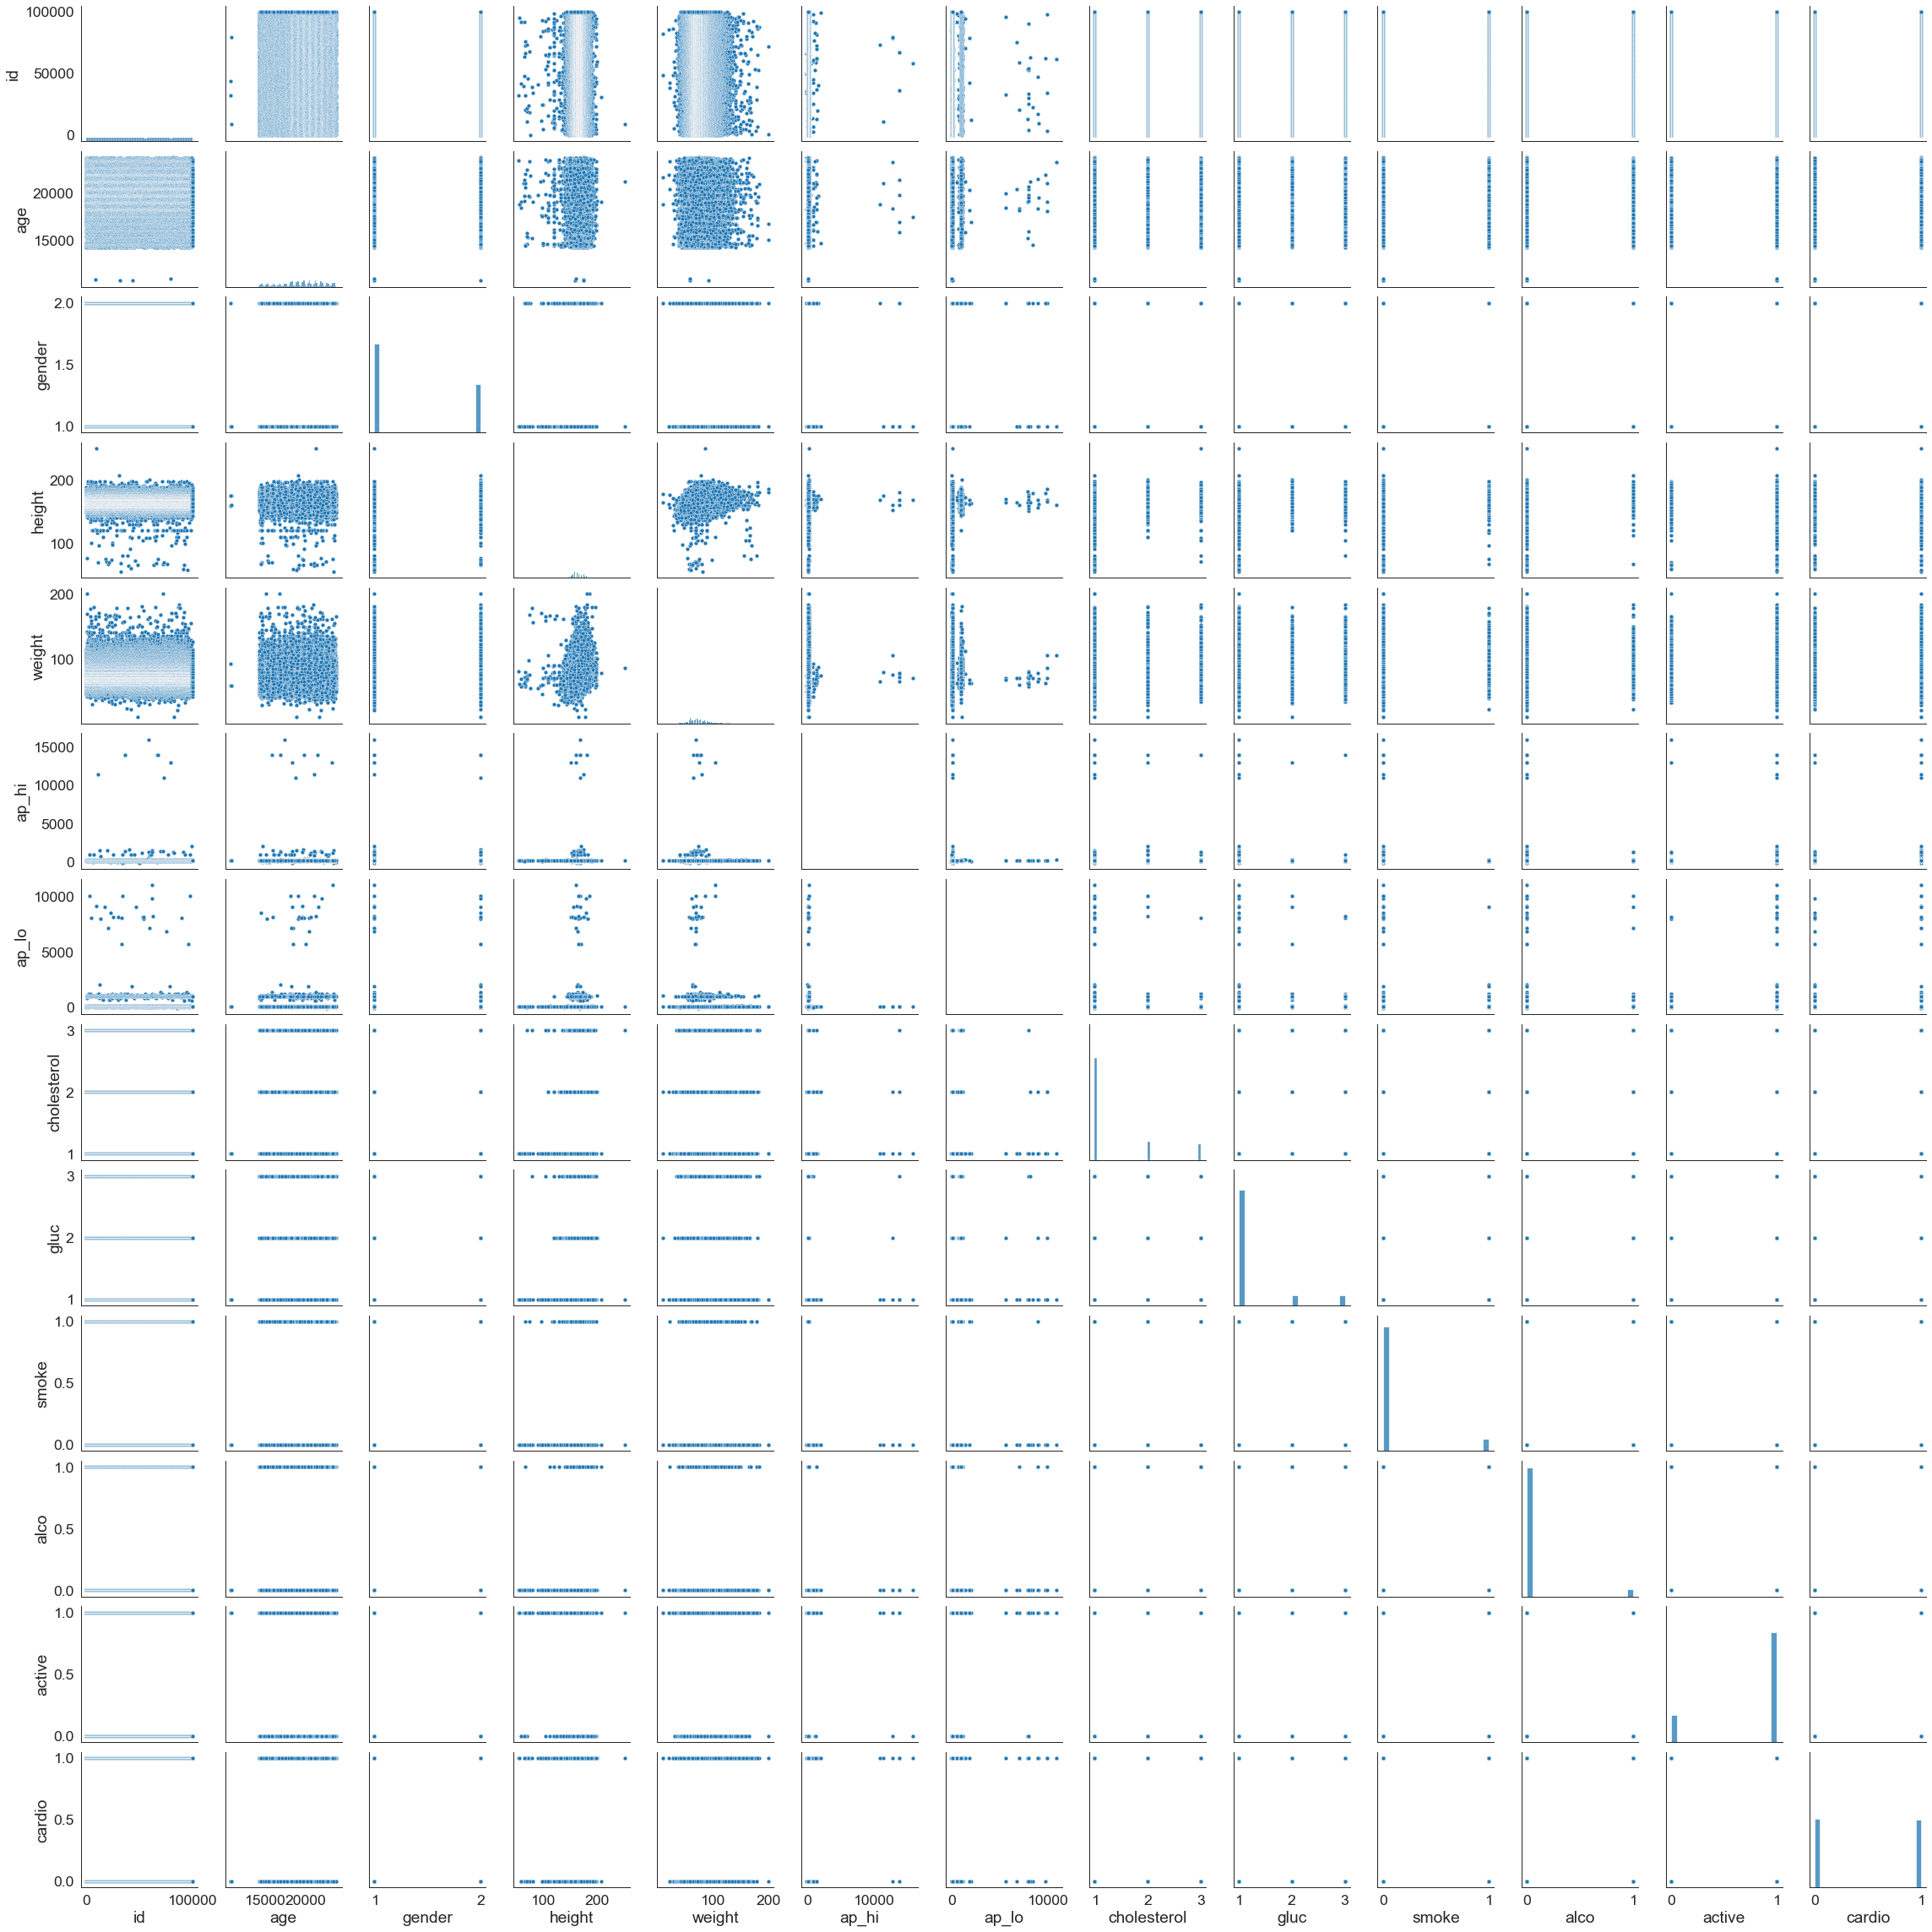

In [215]:
sns.pairplot(CD)

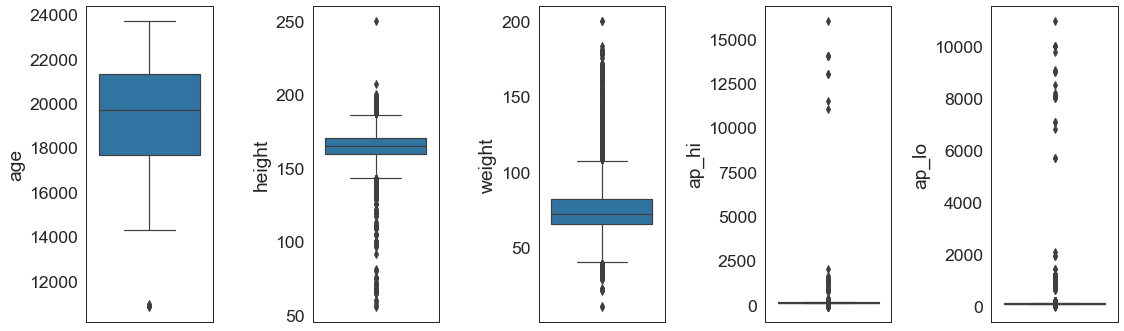

In [223]:
fig, axes = plt.subplots(1, 5, figsize=(16, 5))
sns.boxplot(data=CD, y='age', ax=axes[0])
sns.boxplot(data=CD, y='height', ax=axes[1])
sns.boxplot(data=CD, y='weight', ax=axes[2])
sns.boxplot(data=CD, y='ap_hi', ax=axes[3])
sns.boxplot(data=CD, y='ap_lo', ax=axes[4])
plt.tight_layout()

In [235]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [241]:
aX = np.asarray(CD.cholesterol)
aY = np.asarray(CD.cardio)

aX = sm.add_constant(aX)

model = sm.OLS(aY, aX)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3599.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:36:02   Log-Likelihood:                -49050.
No. Observations:               70000   AIC:                         9.810e+04
Df Residuals:                   69998   BIC:                         9.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2775      0.004     67.087      0.0

In [242]:
aX = np.asarray(CD.active)
aY = np.asarray(CD.cardio)

aX = sm.add_constant(aX)

model = sm.OLS(aY, aX)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     89.09
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           3.88e-21
Time:                        10:40:19   Log-Likelihood:                -50761.
No. Observations:               70000   AIC:                         1.015e+05
Df Residuals:                   69998   BIC:                         1.015e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5358      0.004    125.678      0.0

In [261]:
model = ols('cardio~cholesterol*active', data=CD).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
cholesterol,1.0,855.856735,855.856735,3605.811630,0.000000e+00
active,1.0,25.066862,25.066862,105.609245,9.352391e-25
cholesterol:active,1.0,5.182804,5.182804,21.835683,2.975764e-06
Residual,69996.0,16613.887298,0.237355,NaN,NaN


In [262]:
model2 = ols('cardio ~ cholesterol + active',data=CD).fit()
anova_table = sm.stats.anova_lm(model,model2, type=2)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,69996.0,16613.887298,0.0,NaN,NaN,NaN
1,69997.0,16619.070103,-1.0,-5.182804,21.829185,NaN


In [263]:
anova_table = sm.stats.anova_lm(model2, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
cholesterol,1.0,855.856735,855.856735,3604.738624,0.000000e+00
active,1.0,25.066862,25.066862,105.577818,9.501666e-25
Residual,69997.0,16619.070103,0.237425,NaN,NaN
